<h1 style="text-align: center;">Implementation of CNN for Image Classification on MNIST Dataset</h1>
<h3>Author: Johan Winarwan Nawawi | 3322600023 | 3 STr SDT A</h3>

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l1, l2

import warnings
warnings.filterwarnings('ignore')

Importing several libraries required for the CNN and deep learning practical experiment

## Read Dataset

In [2]:
train = pd.read_csv("Data/MNIST/train.csv")
test = pd.read_csv("Data/MNIST/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Displaying the train dataset

In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Displaying the test dataset

## Data Preprocessing

In [4]:
X = train.drop(['label'], axis=1).values
y = train['label'].values
X = X / 255.0
X = X.reshape(-1,28,28,1)
X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

During the preprocessing stage, the **label** column is removed, leaving only the image data in the variable **X**. The pixel values are normalized to a range of 0-1 by dividing them by 255. The image data is then reshaped into a **28x28** matrix with **1 channel** (grayscale) to meet the input format required by the CNN.

## Konversi Label

In [5]:
y = to_categorical(y)
print(f"Label size {y.shape}")

Label size (42000, 10)


At this stage, the label array **`y`** is converted into **one-hot encoding** format for multi-class classification, where each label is represented by a binary vector. Subsequently, the size of the one-hot encoded label array is printed to verify the number of samples and classes present.

## Data Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.1, random_state=0)

The data is divided into two parts: training data and testing data, with the testing data comprising 10% of the total dataset.

## Data Reshape

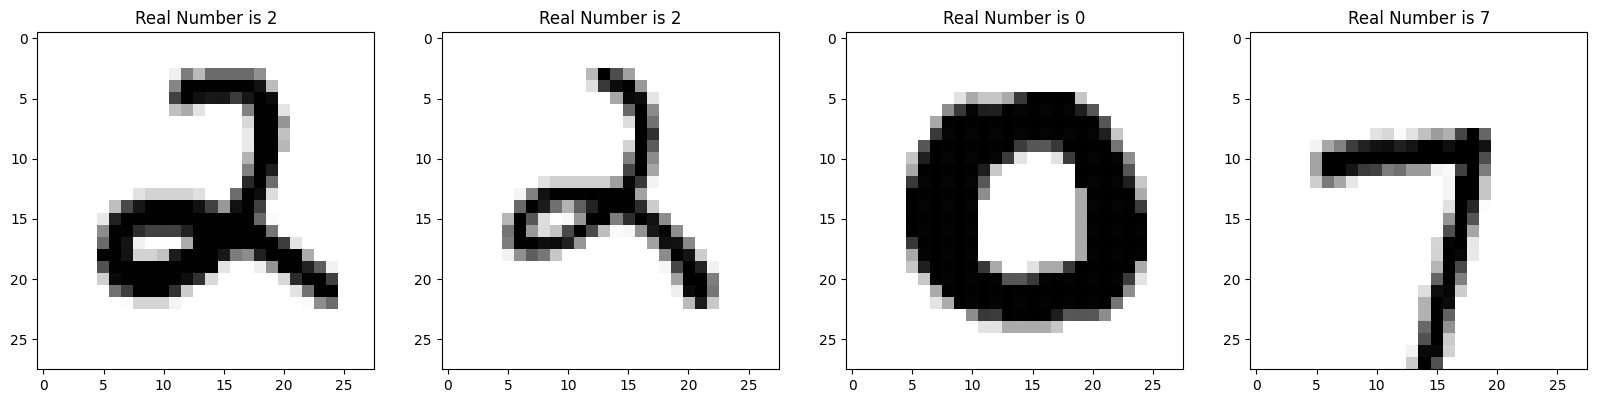

In [7]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}")

The above lines of code are used to visualize four examples from the training dataset, displaying the actual digits along with their grayscale image representations.

## Mean and Standard Deviation

In [8]:
mean = np.mean(X_train)
std = np.std(X_train)
def standardize(x):
    return (x-mean)/std

Sets up a standardization process for the training data, which is often an important preprocessing step in machine learning to improve model performance and convergence.

## CNN Model

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Defines a CNN architecture that is suitable for image classification tasks, particularly for datasets with images of size 28x28 pixels.

## Summary Model

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

Displays a summary to help understand the model's structure, which is useful for debugging and optimizing the neural network.

## Compile Model

In [11]:
model.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Configures the model to use categorical crossentropy as the loss function, Adam as the optimizer, and accuracy as the performance metric.

## Model Fit

In [12]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    verbose=2,
                    validation_split=0.3)

Epoch 1/10
207/207 - 3s - 16ms/step - accuracy: 0.8293 - loss: 0.5203 - val_accuracy: 0.9604 - val_loss: 0.1358
Epoch 2/10
207/207 - 2s - 10ms/step - accuracy: 0.9612 - loss: 0.1309 - val_accuracy: 0.9755 - val_loss: 0.0784
Epoch 3/10
207/207 - 2s - 10ms/step - accuracy: 0.9746 - loss: 0.0855 - val_accuracy: 0.9772 - val_loss: 0.0699
Epoch 4/10
207/207 - 2s - 10ms/step - accuracy: 0.9808 - loss: 0.0629 - val_accuracy: 0.9823 - val_loss: 0.0600
Epoch 5/10
207/207 - 2s - 10ms/step - accuracy: 0.9842 - loss: 0.0513 - val_accuracy: 0.9814 - val_loss: 0.0598
Epoch 6/10
207/207 - 2s - 10ms/step - accuracy: 0.9858 - loss: 0.0468 - val_accuracy: 0.9833 - val_loss: 0.0590
Epoch 7/10
207/207 - 2s - 10ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.9839 - val_loss: 0.0559
Epoch 8/10
207/207 - 2s - 10ms/step - accuracy: 0.9902 - loss: 0.0319 - val_accuracy: 0.9870 - val_loss: 0.0504
Epoch 9/10
207/207 - 2s - 10ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.9869 - val_loss:

Trains the neural network for 10 epochs with a batch size of 128, using 30% of the training data for validation and displaying detailed training progress. 

## Plotting

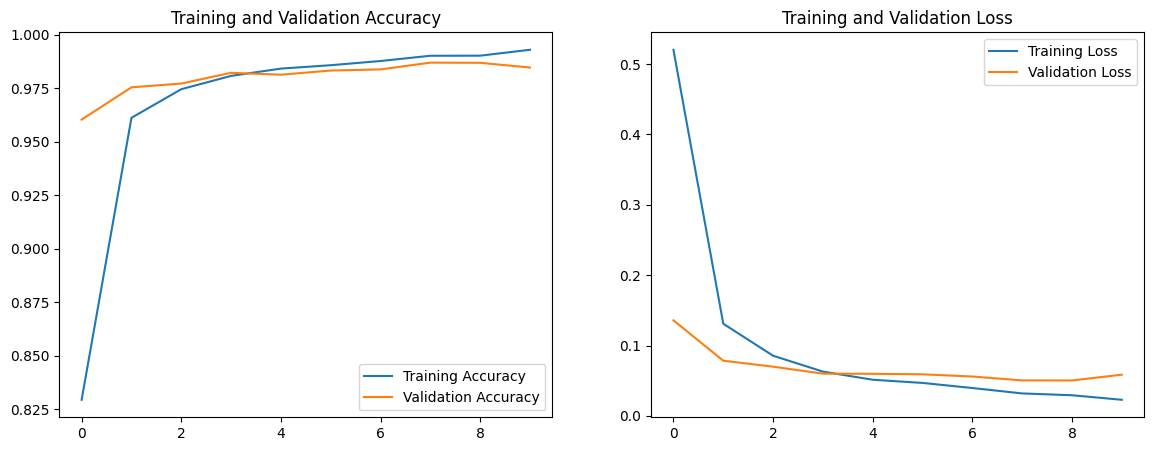

In [13]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This visualization shows the training and validation accuracy and loss over the epochs, allowing for an assessment of the model's performance during training. From this visualization, it can be observed that overfitting occurs, where the training accuracy improves well while the validation accuracy begins to decline after a certain number of epochs.

## Confusion Matrix Plotting

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


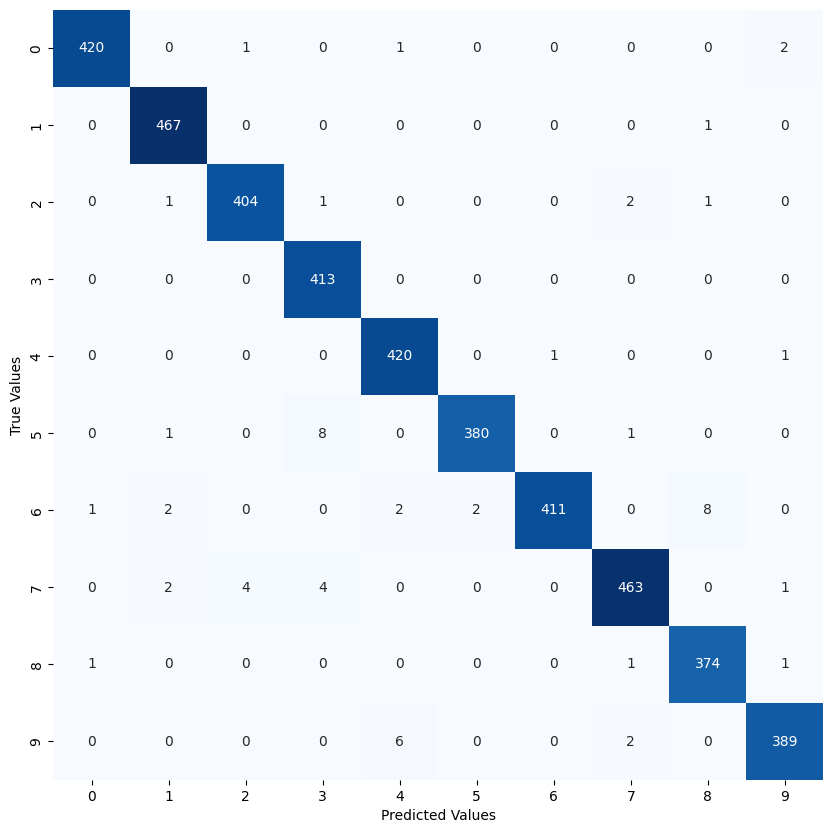

In [14]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,
fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

The analysis of the confusion matrix reveals that there are several classes incorrectly predicted by the model. Although the number of examples across classes is balanced, these errors are due to the model being suboptimal. For improvement, the model can be remade with different parameters, and further analysis should be conducted on the classes that are frequently misclassified.

## Classification Report

In [15]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       422
           1       1.00      0.99      0.99       473
           2       0.99      0.99      0.99       409
           3       1.00      0.97      0.98       426
           4       1.00      0.98      0.99       429
           5       0.97      0.99      0.98       382
           6       0.96      1.00      0.98       412
           7       0.98      0.99      0.98       469
           8       0.99      0.97      0.98       384
           9       0.98      0.99      0.98       394

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



The classification report shows excellent performance, with precision and recall values ranging from 0.98 to 1.00 across all classes. The model achieves an overall accuracy of 0.99 on 4200 samples, indicating effective classification. However, overfitting has occurred, meaning the model has overly adapted to the training data and may not generalize well to new data.

## Evaluasi

In [16]:
model.evaluate(X_test, y_test, verbose=False)

[0.05516688898205757, 0.9859523773193359]

The evaluation results of the model on the test dataset show two key metrics: a loss of about **0.0501** and an accuracy of **98.69%**. This indicates that the model performs quite well, with the low loss suggesting effective predictions. However, it’s important to note that while this accuracy seems impressive, there is an issue of overfitting that could affect the model's performance when faced with new data.

## Model Prediksi

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


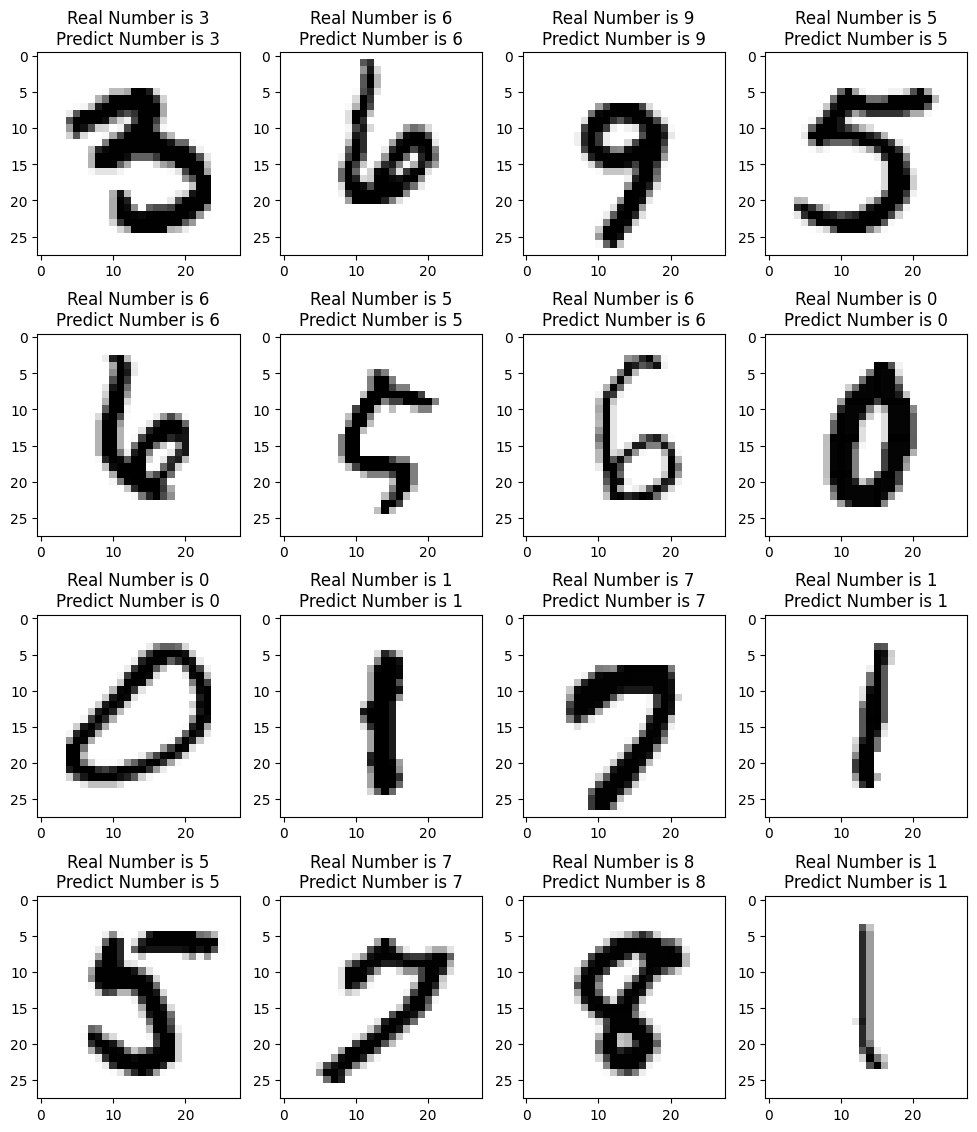

In [17]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

From the evaluation on the test data, it can be seen that there are 16 digits that were predicted correctly in all cases.

## Testing our Model

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


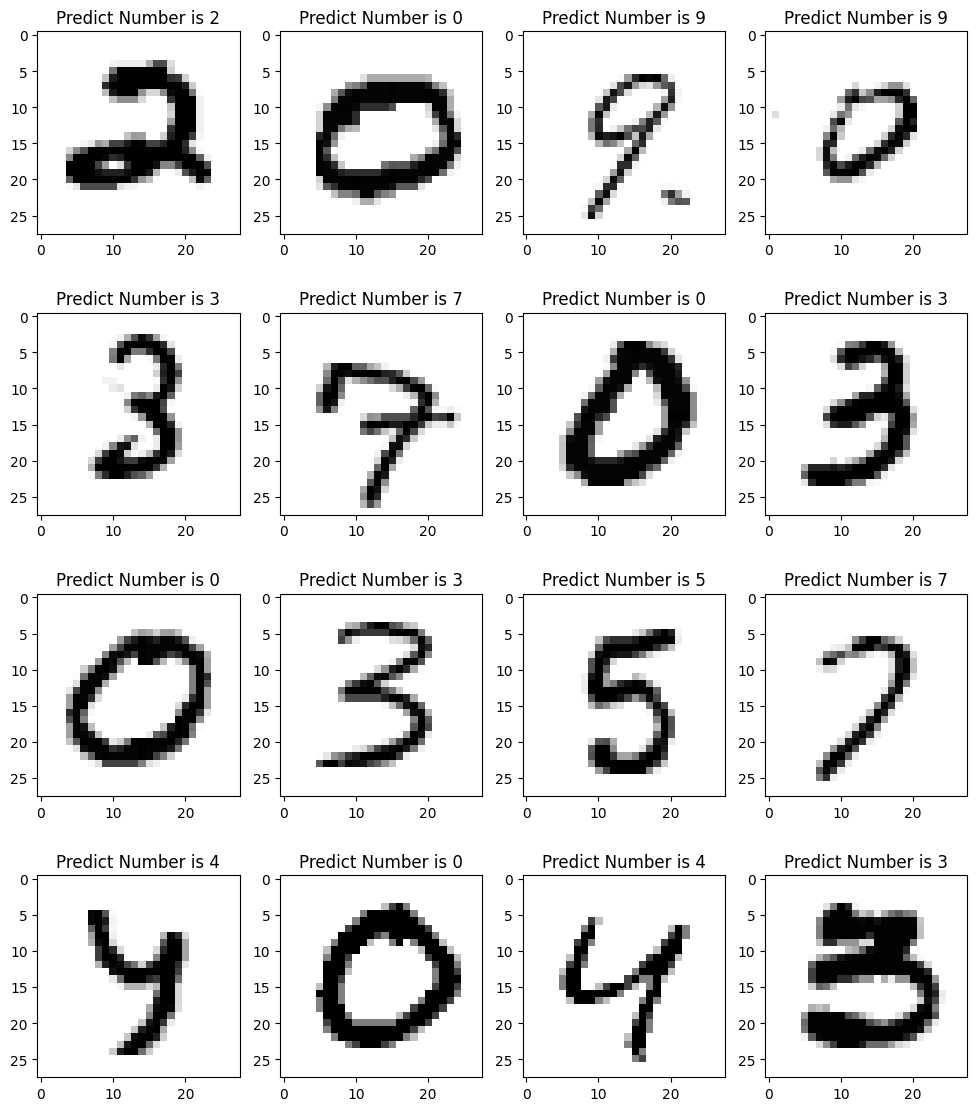

In [18]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)
pred_x = model.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

From the evaluation on the labeled data, it can be seen that there are 15 digits predicted correctly in all cases, while one digit was misclassified; it should have been a 0 but was predicted as a 9.

# Adjusted Parameter

## Model 1

In [19]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu',
                input_shape=(28,28,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu',
                kernel_regularizer=l2(0.05)))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

In [20]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,434 (544.66 KB)

 Trainable params: 139,434 (544.66 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model 1

In [21]:
model1.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Model 1 Fit with 20 Epoch

In [22]:
history = model1.fit(X_train, y_train,
                    epochs=20,
                    batch_size=352,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3480 - loss: 8.0653 - val_accuracy: 0.9257 - val_loss: 0.8842
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8795 - loss: 0.8382 - val_accuracy: 0.9555 - val_loss: 0.3374
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9248 - loss: 0.4370 - val_accuracy: 0.9525 - val_loss: 0.2863
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9346 - loss: 0.3523 - val_accuracy: 0.9686 - val_loss: 0.2210
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9513 - loss: 0.2980 - val_accuracy: 0.9698 - val_loss: 0.2128
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9529 - loss: 0.2782 - val_accuracy: 0.9749 - val_loss: 0.1951
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9581 - loss: 0.2591 - val_accuracy: 0.9735 - val_loss: 0.1992
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9534 - loss: 0.2810 - val_accuracy: 0.9735 - v

In the previous model fit, the epoch value was changed from 10 to 20, the batch size from 128 to 352, and verbose was set to 1.

### Plotting Model 1 with 20 Epoch

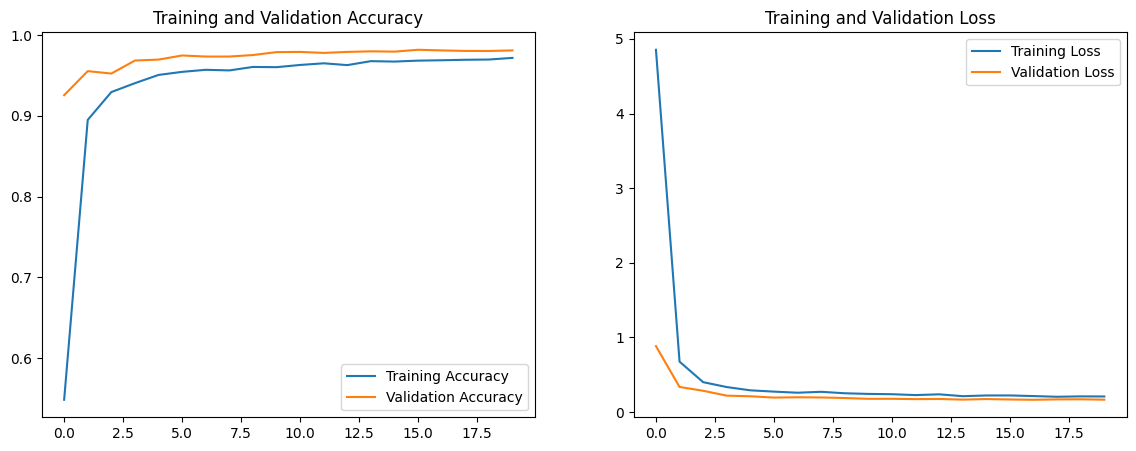

In [23]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Classification Report and Evaluate Model 1 with 20 Epoch

In [24]:
y_pred = model1.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
print(classification_report(Y_test, Y_pred))
print()
model1.evaluate(X_test, y_test, verbose=False)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       422
           1       0.99      0.99      0.99       473
           2       0.99      0.98      0.98       409
           3       0.97      0.99      0.98       426
           4       0.98      0.98      0.98       429
           5       0.99      0.98      0.99       382
           6       0.98      0.99      0.98       412
           7       0.97      0.99      0.98       469
           8       0.98      0.97      0.97       384
           9       1.00      0.96      0.98       394

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200




[0.17070701718330383, 0.9816666841506958]

### Confusion Matrix Model 1 - 20 Epoch

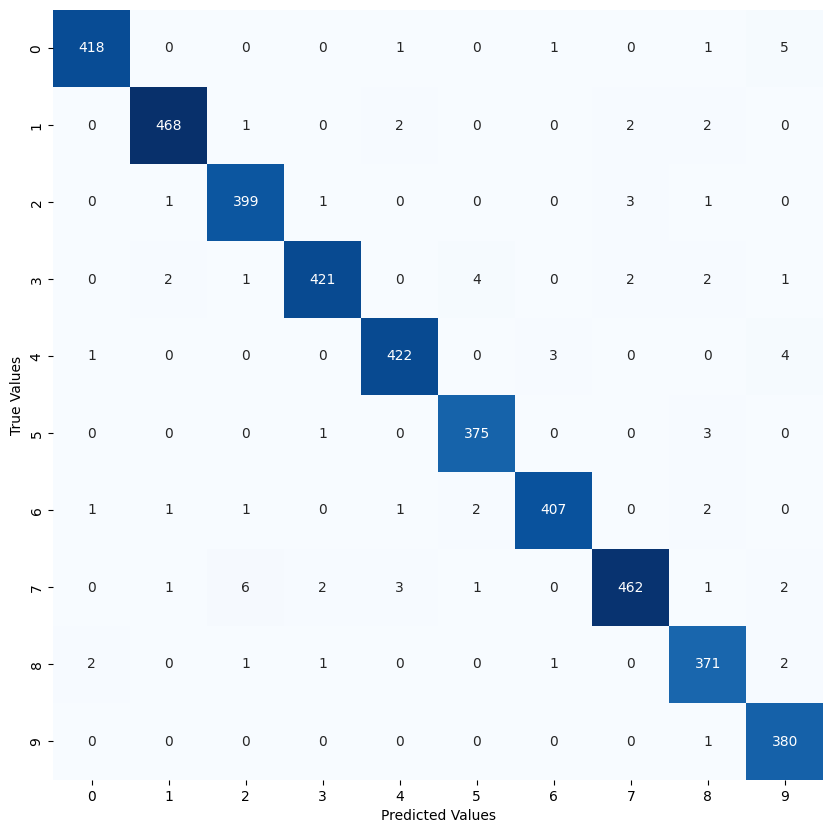

In [25]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,
fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Model 1 Prediction with 20 Epoch

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


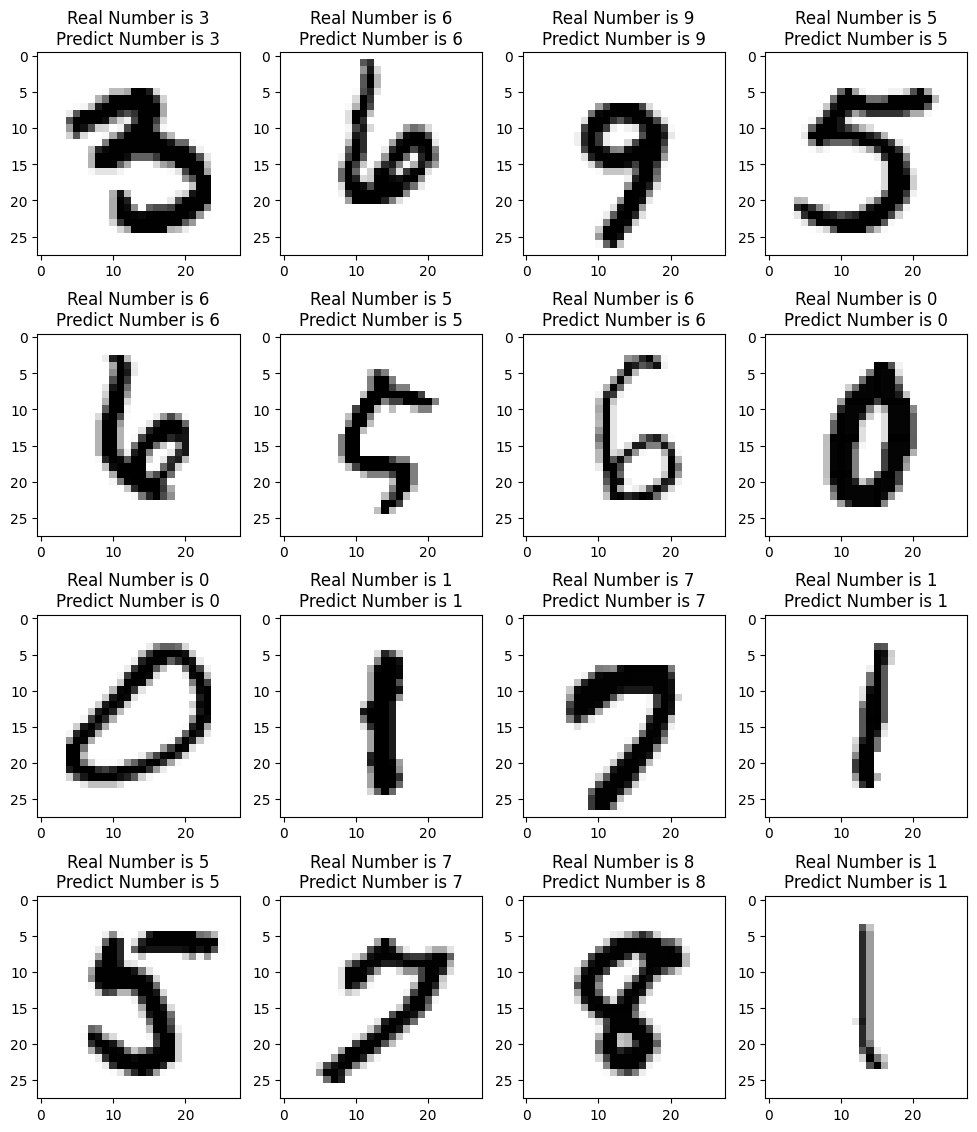

In [26]:
y_pred = model1.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

### Testing Model 1 with 20 Epoch

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


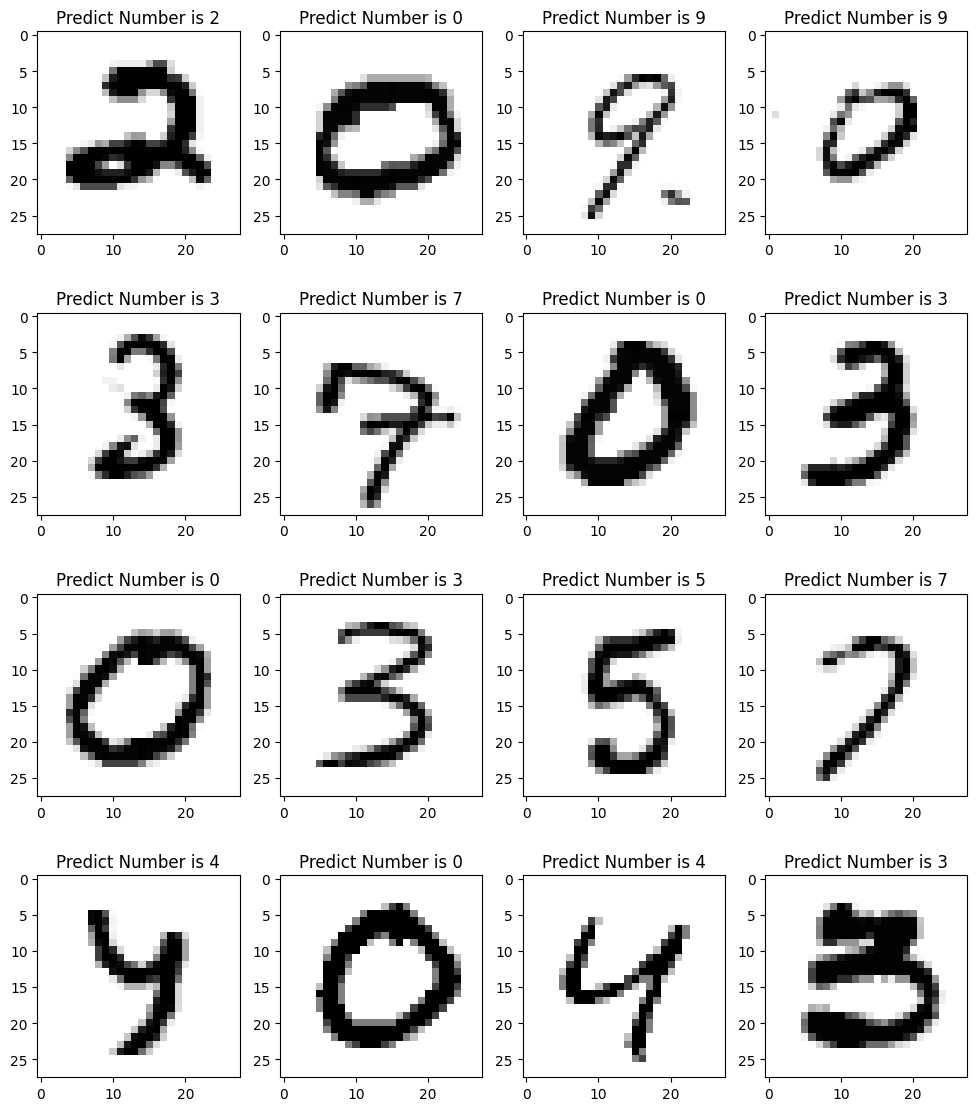

In [27]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)
pred_x = model1.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

## Model 1 Fit with 60 Epoch

In [28]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu',
                input_shape=(28,28,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu',
                kernel_regularizer=l2(0.05)))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model1.fit(X_train, y_train,
                    epochs=60,
                    batch_size=352,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3369 - loss: 8.0732 - val_accuracy: 0.9086 - val_loss: 0.9629
Epoch 2/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8587 - loss: 0.9180 - val_accuracy: 0.9563 - val_loss: 0.3609
Epoch 3/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9140 - loss: 0.4747 - val_accuracy: 0.9608 - val_loss: 0.2794
Epoch 4/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9353 - loss: 0.3790 - val_accuracy: 0.9605 - val_loss: 0.2486
Epoch 5/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9369 - loss: 0.3434 - val_accuracy: 0.9711 - val_loss: 0.2139
Epoch 6/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9501 - loss: 0.2994 - val_accuracy: 0.9733 - val_loss: 0.2020
Epoch 7/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9551 - loss: 0.2701 - val_accuracy: 0.9733 - val_loss: 0.1987
Epoch 8/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9524 - loss: 0.2751 - val_accuracy: 0.9760 - v

### Plotting Model 1 with 60 Epoch

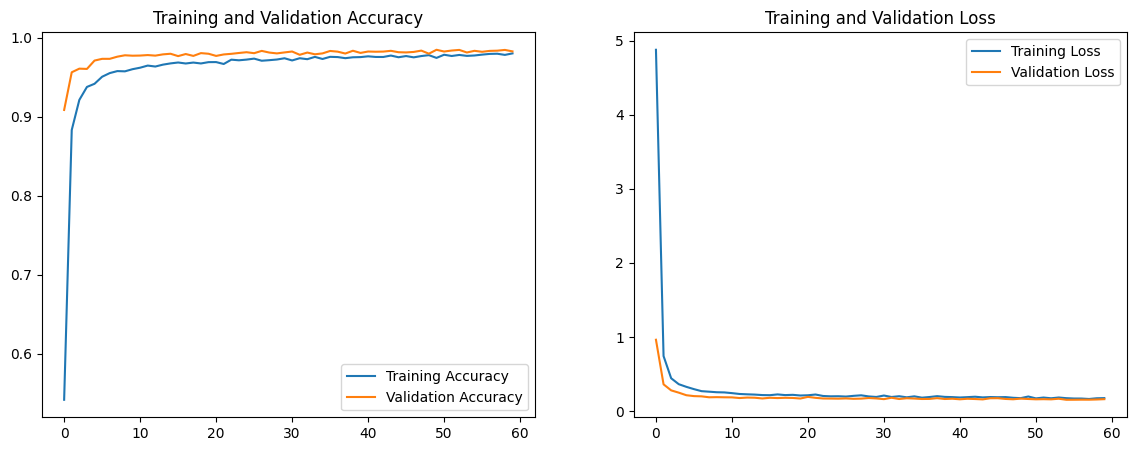

In [29]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Classification Report and Evaluate Model 1 with 60 Epoch

In [30]:
y_pred = model1.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
print(classification_report(Y_test, Y_pred))
print()
model1.evaluate(X_test, y_test, verbose=False)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       422
           1       0.99      0.99      0.99       473
           2       0.97      0.99      0.98       409
           3       1.00      0.97      0.98       426
           4       0.98      0.99      0.98       429
           5       0.99      0.98      0.99       382
           6       0.97      1.00      0.98       412
           7       0.98      0.98      0.98       469
           8       0.98      0.98      0.98       384
           9       0.99      0.96      0.98       394

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200




[0.15746714174747467, 0.9838095307350159]

### Connfusion Matriix Model 1 - 60 Epoch

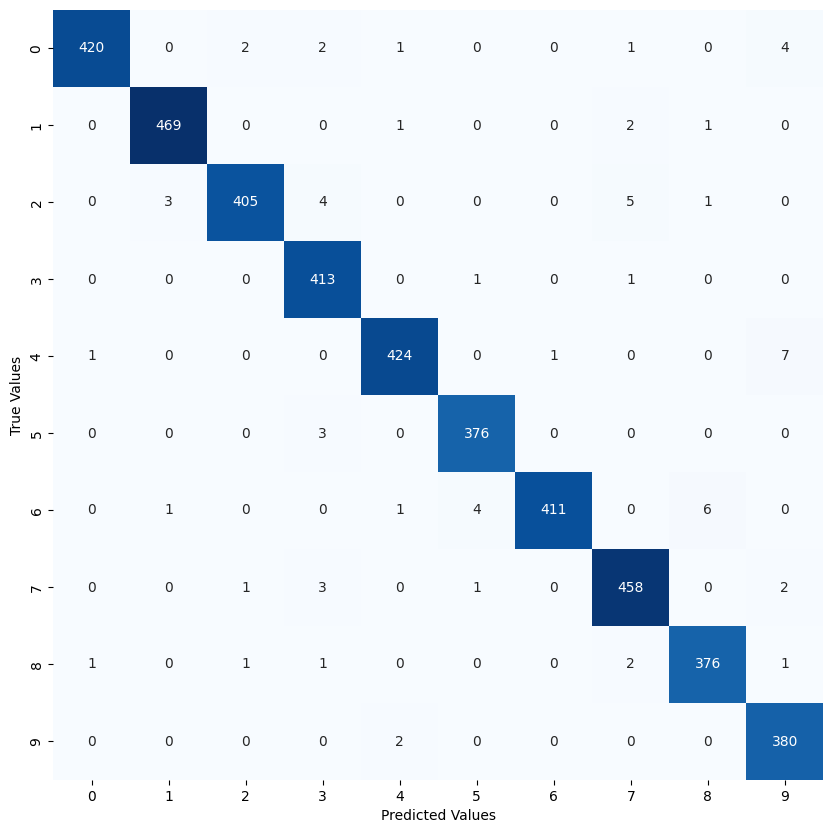

In [31]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,
fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Testing Model 1 with 60 Epoch

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


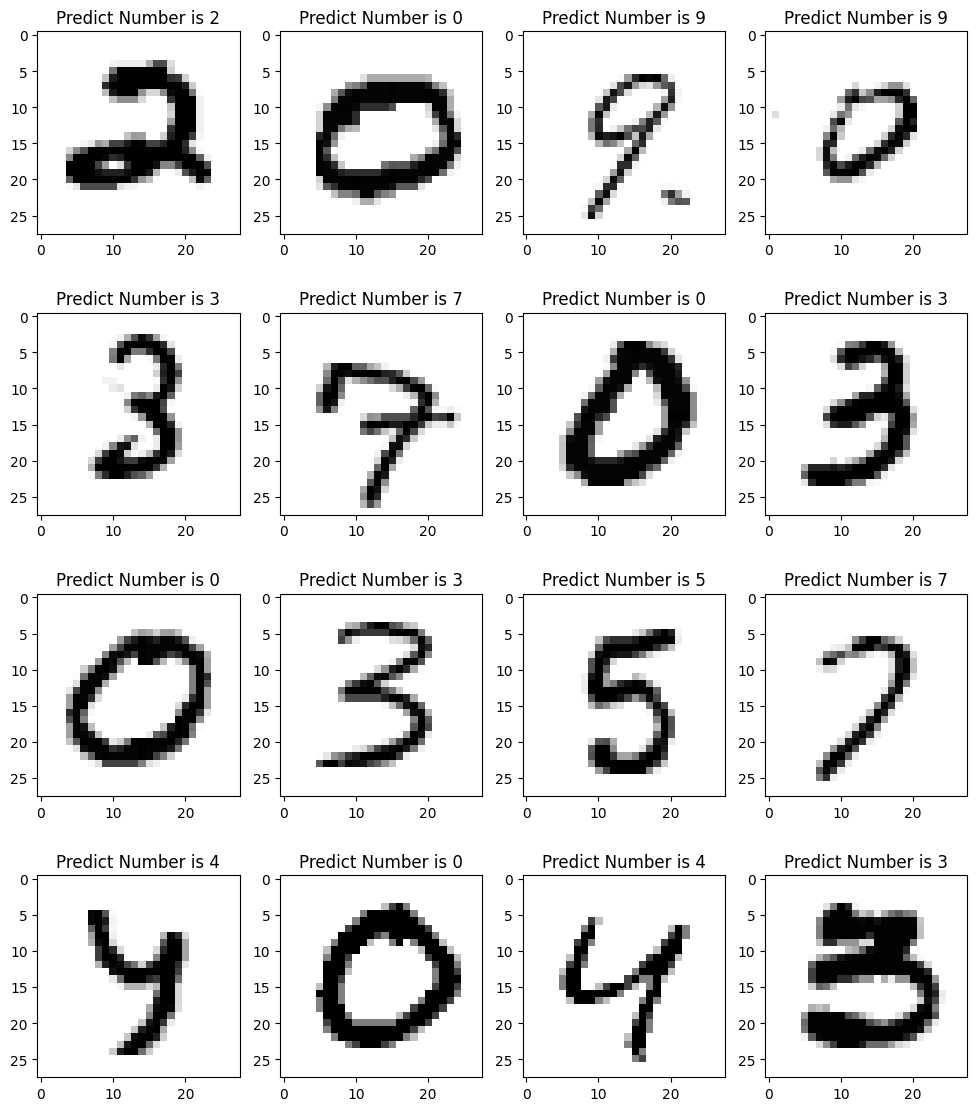

In [32]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)
pred_x = model1.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

## Model 1 Fit with 120 Epoch

In [33]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu',
                input_shape=(28,28,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu',
                kernel_regularizer=l2(0.05)))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model1.fit(X_train, y_train,
                    epochs=120,
                    batch_size=352,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3460 - loss: 7.9965 - val_accuracy: 0.9232 - val_loss: 0.9075
Epoch 2/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8649 - loss: 0.8980 - val_accuracy: 0.9534 - val_loss: 0.3717
Epoch 3/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9201 - loss: 0.4708 - val_accuracy: 0.9630 - val_loss: 0.2694
Epoch 4/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9347 - loss: 0.3616 - val_accuracy: 0.9675 - val_loss: 0.2275
Epoch 5/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9430 - loss: 0.3085 - val_accuracy: 0.9688 - val_loss: 0.2177
Epoch 6/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9442 - loss: 0.3036 - val_accuracy: 0.9718 - val_loss: 0.2067
Epoch 7/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9495 - loss: 0.2821 - val_accuracy: 0.9746 - val_loss: 0.1902
Epoch 8/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9549 - loss: 0.2617 - val_accuracy: 0.

### Plotting Model 1 with 120 Epoch

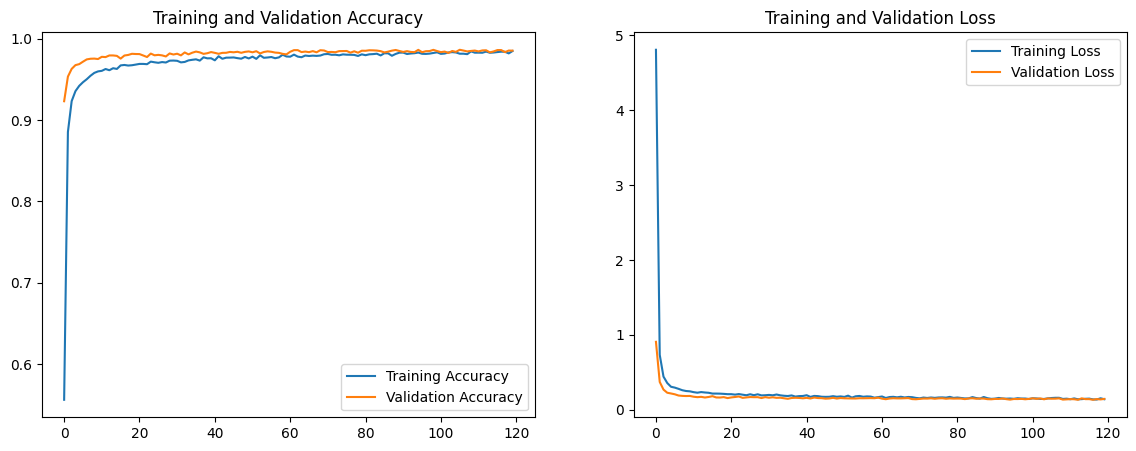

In [34]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Classification Report and Evaluation Model 1 with 120 Epoch

In [35]:
y_pred = model1.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
print(classification_report(Y_test, Y_pred))
print()
model1.evaluate(X_test, y_test, verbose=False)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       422
           1       0.99      0.99      0.99       473
           2       0.99      0.97      0.98       409
           3       0.99      0.99      0.99       426
           4       0.99      0.99      0.99       429
           5       0.99      0.98      0.99       382
           6       0.97      0.99      0.98       412
           7       0.96      0.99      0.98       469
           8       0.99      0.97      0.98       384
           9       0.99      0.97      0.98       394

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200




[0.14772732555866241, 0.9840475916862488]

### Confusion Matrix Model 1 - 120 Epoch

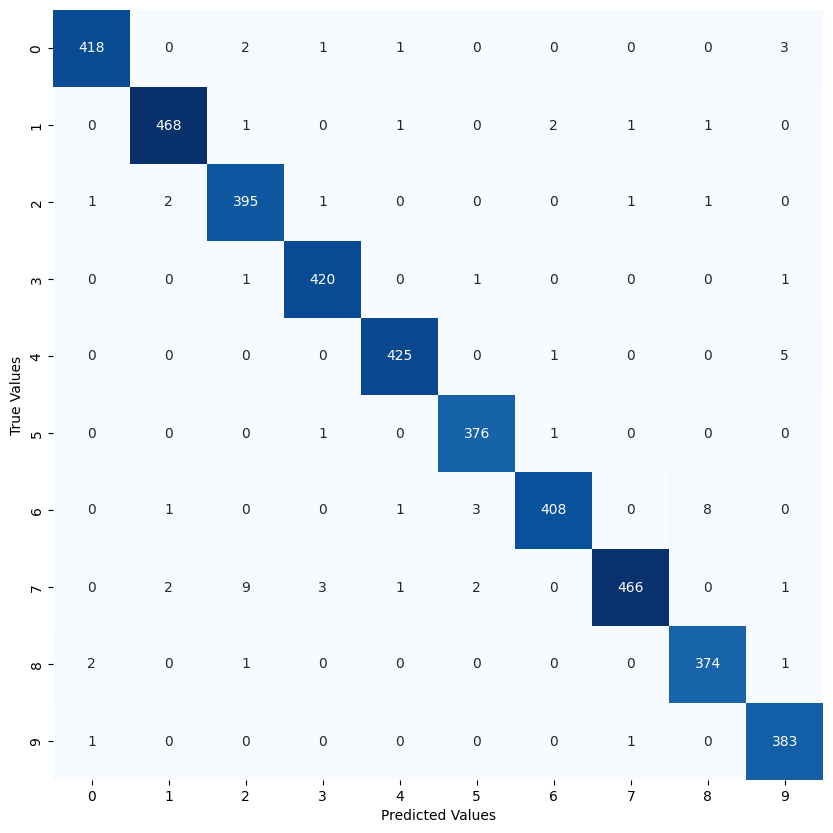

In [36]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,
fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Testing Model 1 with 120 Epoch

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


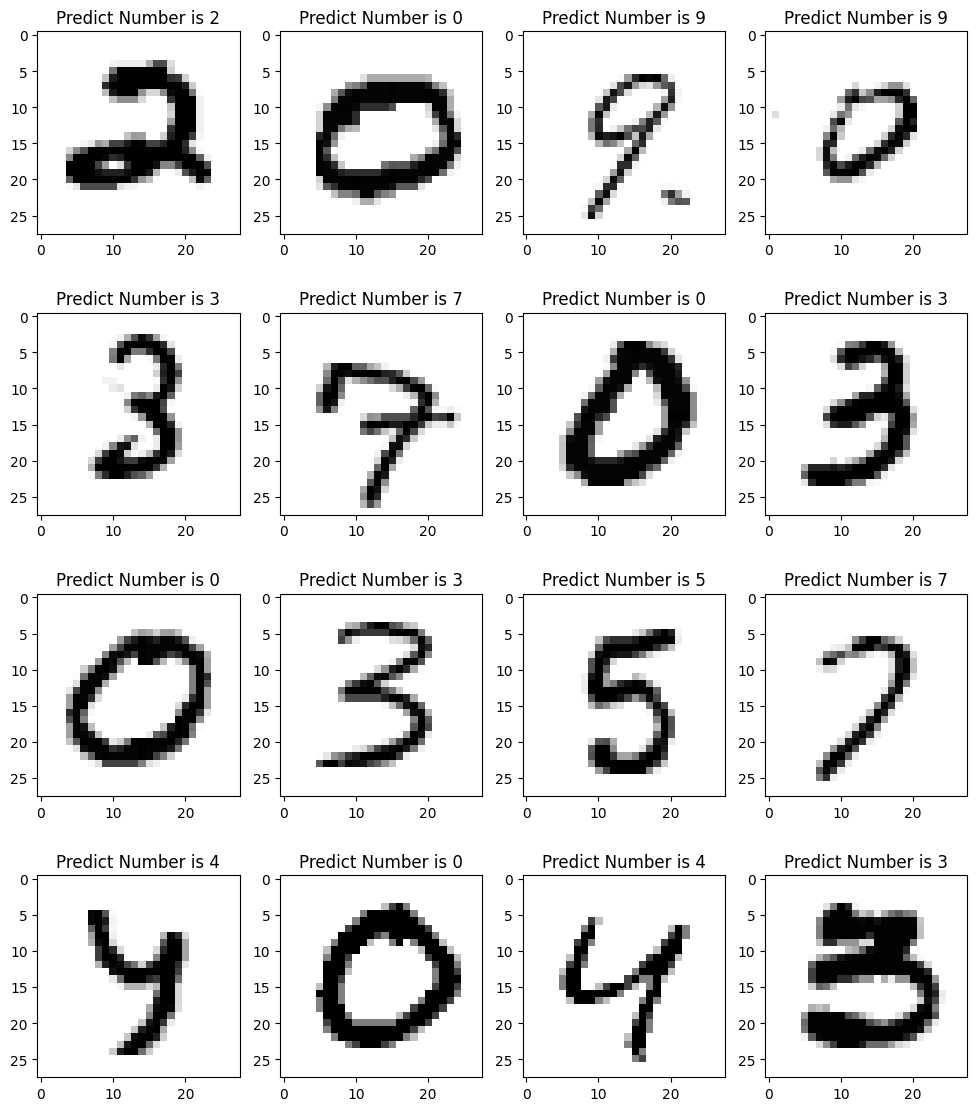

In [37]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)
pred_x = model1.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

## Model 1 with 1000 Epoch and Early Stopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu',
                input_shape=(28,28,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu',
                kernel_regularizer=l2(0.05)))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', 
                        patience=10,        # Training stops if there's no improvement for 10 epochs
                        restore_best_weights=True)  # Uses the best weights before overfitting

# Train the model with early stopping
history = model1.fit(X_train, y_train,
                    epochs=1000,               # Maximum of 1000 epochs
                    batch_size=352,          
                    verbose=1,                
                    validation_split=0.3,      
                    callbacks=[early_stop])    # Early stopping callback


Epoch 1/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3355 - loss: 8.1131 - val_accuracy: 0.9096 - val_loss: 0.9735
Epoch 2/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8551 - loss: 0.9464 - val_accuracy: 0.9535 - val_loss: 0.3971
Epoch 3/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9201 - loss: 0.4870 - val_accuracy: 0.9580 - val_loss: 0.2959
Epoch 4/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9318 - loss: 0.3883 - val_accuracy: 0.9652 - val_loss: 0.2443
Epoch 5/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9474 - loss: 0.3153 - val_accuracy: 0.9730 - val_loss: 0.2120
Epoch 6/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9495 - loss: 0.2991 - val_accuracy: 0.9735 - val_loss: 0.2022
Epoch 7/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9492 - loss: 0.2822 - val_accuracy: 0.9738 - val_loss: 0.2036
Epoch 8/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9539 - loss: 0.2746 - val_accu

### Plotting Model 1 with Early Stopping

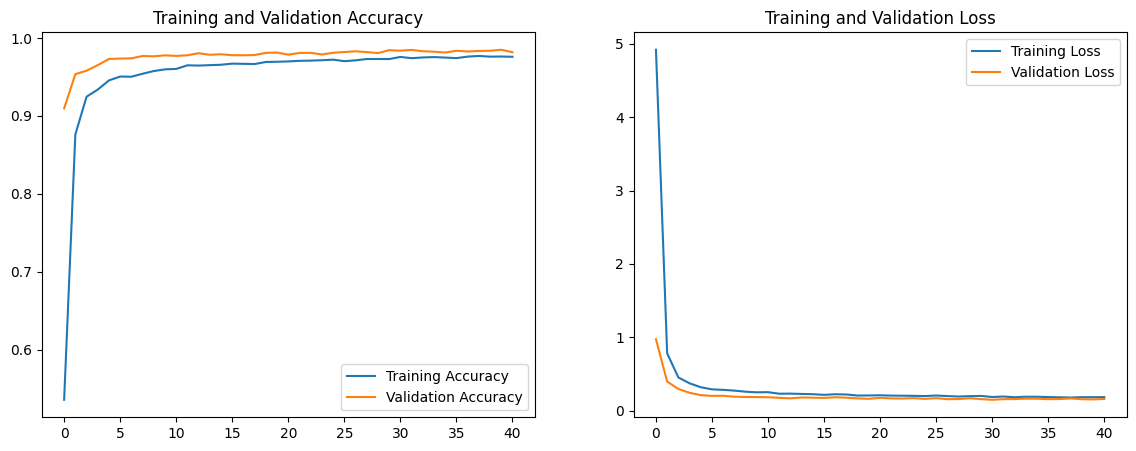

In [40]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix Model 1 - Early Stopping

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


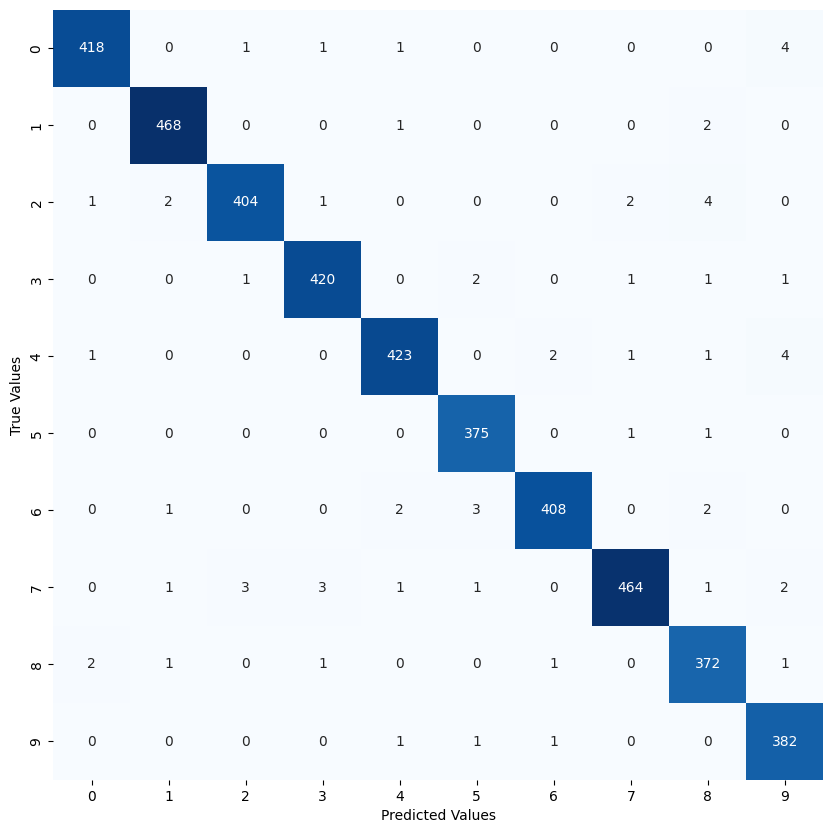

In [41]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
y_pred = model1.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,
fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Classification Report and Evaluate Model with Early Stopping

In [42]:
print(classification_report(Y_test, Y_pred))
print()
model1.evaluate(X_test, y_test, verbose=False)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       422
           1       0.99      0.99      0.99       473
           2       0.98      0.99      0.98       409
           3       0.99      0.99      0.99       426
           4       0.98      0.99      0.98       429
           5       0.99      0.98      0.99       382
           6       0.98      0.99      0.99       412
           7       0.97      0.99      0.98       469
           8       0.98      0.97      0.98       384
           9       0.99      0.97      0.98       394

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200




[0.1440250724554062, 0.9842857122421265]

### Testing Model 1 with Early Stopping

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


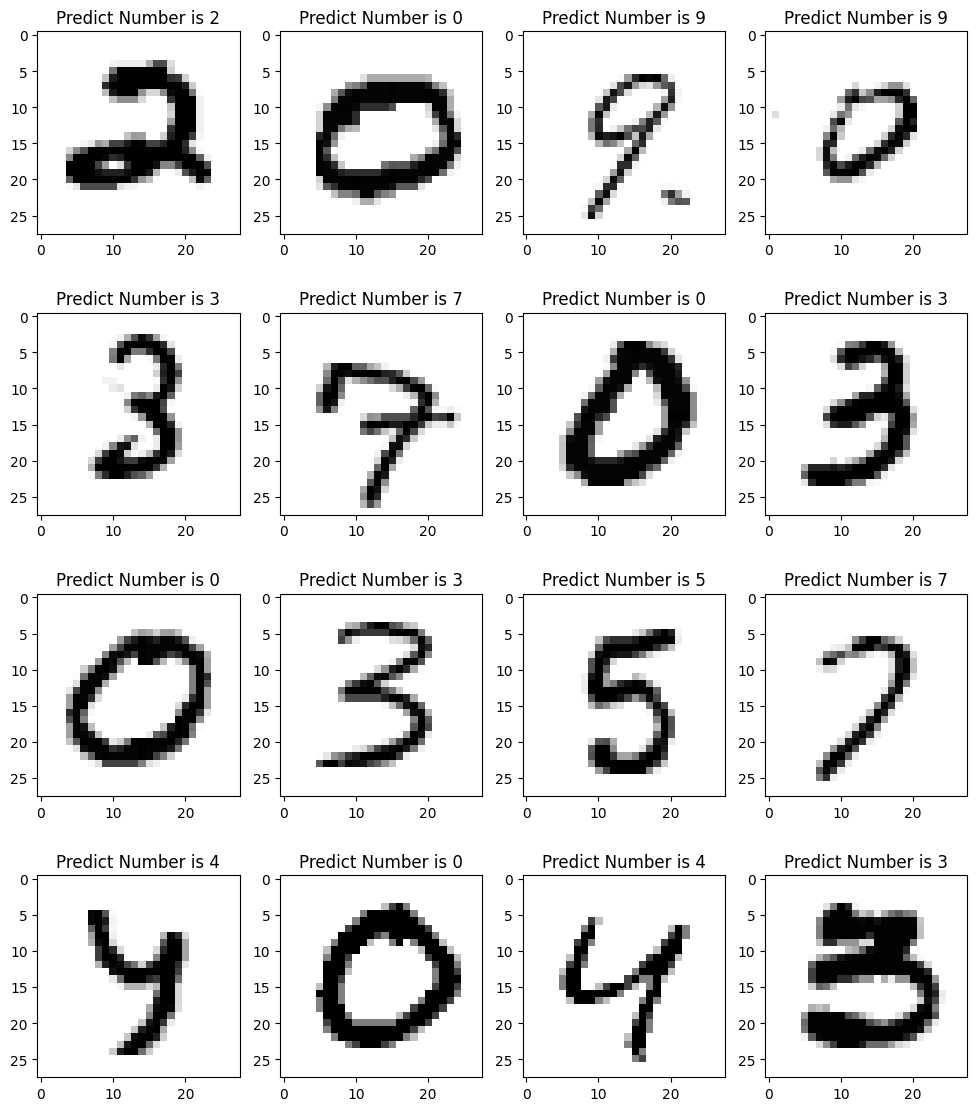

In [43]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)
pred_x = model1.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");